EDA and data visualization of COVID-19 data from FOHM.

https://www.folkhalsomyndigheten.se/smittskydd-beredskap/utbrott/aktuella-utbrott/covid-19/nar-hande-vad-under-pandemin/
https://www.folkhalsomyndigheten.se/smittskydd-beredskap/utbrott/aktuella-utbrott/covid-19/informationsmaterial/bilder/


### Datasets:

### * `cov_vacc`: Covid-19-vaccinationstäckning, efter dos, ålder och region. Antal, andel (procent).

"Källa: Nationella vaccinationsregistret (NVR)
https://www.folkhalsomyndigheten.se/smittskydd-beredskap/vaccinationer/nationella-vaccinationsregistret/ "
Statistiken omfattar givna vaccinationer (utifrån vaccinationsdatum) till och med föregående vecka och uppdateras varje torsdag kl 14:00.
Efterregistrering görs vilket betyder att uppgifterna i registret uppdateras löpande även bakåt i tiden. 
Överföringen från journalsystemen till NVR sker automatiskt (hel- eller halvautomatiskt).

"Från 2023-10-27 har filen bytt nämnardata till folkmängd den 31 augusti 2023 enligt SCB. I redovisningar över andel vaccinerade rensades data på personer som avlidit till och med det datumet.
Ålder avser uppnådd ålder vid slutet av 2023, d.v.s. i princip en redovisning efter födelseår."

Vaccinationer tidsserie: Utförda vaccinationer, totalt oavsett dos, per vecka (kumulativt) utifrån den vaccinerades folkbokföringsadress. Antal utan begränsning på ålder.

Minst 1 dos: Vaccinerade (sedan början) med minst 1 dos per åldersgrupp utifrån den vaccinerades folkbokföringsadress. Antal och andel av befolkningen.

"Aktuell dos: Vaccinerade från och med 2023-10-01 per åldersgrupp utifrån den vaccinerades folkbokföringsadress. Antal och andel av befolkningen i länet 65-79 år, 80 år och äldre.
"

Senaste uppdatering:
20240208 09:00




### * `cov_case_day_region`: Fall efter region och dag (tidsserie). Antal.

### * `cov_case_sex_region_week`: Fall efter kön, region och vecka (tidsserie). Antal, antal per 100 000 inv.

Data sammanställs veckovis fram till och med föregående söndag och görs tillgänglig på torsdagar.
Bekräftade fall är personer med påvisad infektion med SARS-CoV-2 enligt...

I statistiken för 2020 och 2021 redovisar Folkhälsomyndigheten ett covid-19 fall per individ och 12 månaders period. 
Från den 1 januari 2022 redovisas fall med ny infektion för samma individ om det passerat sex månader från den tidigare anmälda infektionen. Uppgifterna är preliminära och kan komma att justeras i efterhand. Där uppgift om kön presenteras avses juridiskt kön. Regionstillhörighet baseras på uppgifter från SmiNet utifrån den region där ansvarig smittskyddsenhet finns. Kommuntillhörighet för fallen baseras på data från totalbefolkningsregistret från föregående år.

Senaste uppdatering:
20240208 08:00

Källa:
Folkhälsomyndigheten, SmiNet, Statistikmyndigheten SCB

### * `cov_iva_death_region_week`: Fall, nya intensivvårdade och avlidna efter region och vecka (tidsserie). Antal, antal per 100 000 inv.

Data sammanställs veckovis fram till och med föregående söndag och görs tillgänglig på torsdagar.
Det finns en viss fördröjning i rapporteringen av intensivvårdade respektive avlidna bekräftade fall. De rapporterade antalen för de två senaste veckorna förväntas därför bli något högre, särskilt vad gäller den senaste veckan.
Bekräftade fall är personer med påvisad infektion med SARS-CoV-2 enligt...

I statistiken för 2020 och 2021 redovisar Folkhälsomyndigheten ett covid-19 fall per individ och 12 månaders period. Från den 1 januari 2022 redovisas fall med ny infektion för samma individ om det passerat sex månader från den tidigare anmälda infektionen. Uppgifterna är preliminära och kan komma att justeras i efterhand. Där uppgift om kön presenteras avses juridiskt kön. Regionstillhörighet baseras på uppgifter från SmiNet utifrån den region där ansvarig smittskyddsenhet finns. Kommuntillhörighet för fallen baseras på data från totalbefolkningsregistret från föregående år.

Genom Svenska Intensivvårdsregistrets särskilda rapporteringsmodul SIRI sker övervakning av intensivvårdade patienter med covid-19. Antalet intensivvårdade patienter baseras på bekräftade fall med påvisad infektion med SARS-CoV-2 och presenteras utifrån inskrivningsdatum till intensivvården. Viss fördröjning i rapporteringen förekommer, vilket betyder att antalet intensivvårdade patienter per vecka kan komma att ändras. Mer information om <a HREF=https://www.icuregswe.org/data--resultat/webbformular/siri-influensaregistrering//>SIRI</a>.

Dödfallen i Folkhälsomyndighetens statistik för 2020-2022 visar antalet personer med laboratoriebekräftad covid-19 som avlidit, oavsett dödsorsak, och är rapporterade som avlidna i databasen SmiNet. Dödsfallen har antingen rapporterats avlidna av behandlande läkare eller avlidit enligt folkbokföringen inom 30 dagar efter en covid-19 diagnos. I ett begränsat antal fall kan det vara känt av Smittskyddsenheten att dödsorsaken inte varit relaterad till covid-19 och då räknas inte dödsfallet med i statistiken. För fall anmälda från och med den 1 januari 2023 har definitionen av avlidna ändrats. Statistiken för 2023 visar antalet personer med laboratoriebekräftad covid-19 som avlidit enligt folkbokföringen, oavsett dödsorsak, inom 30 dagar efter en covid-19 diagnos. Därmed behöver inte uppgift om avliden vara rapporterad i SmiNet för att räknas i statistiken. Ändringen trädde i kraft den 21 juni och i samband med detta reviderades antalet avlidna fall anmälda från och med 1 januari 2023.


Senaste uppdatering:
20240208 08:00

Källa:
Folkhälsomyndigheten, SmiNet, Statistikmyndigheten SCB, Svenska Intensivvårdsregistret SIR

# EDA Report

## Packages

In [320]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import matplotlib.dates as mdates
import seaborn as sns
import joypy
from sklearn.datasets import load_iris
import re 

In [390]:
bob_ross_palette = [
    '#5b7f9a',  # Prussian Blue
    '#7f9fbf',  # Cerulean Blue
    '#bf9b7f',  # Van Dyke Brown
    '#9b7f5b',  # Burnt Umber
    '#bf8f5b',  # Cadmium Yellow
    '#7fbf9b',  # Sap Green
    '#4c664d',  # Phthalo Green
    '#a4bf9b',  # Light Green
    '#ffcc99',  # Naples Yellow
    '#ffad7f',  # Cadmium Orange
    '#ff8f5b',  # Bright Red
    '#ff7f9b',  # Permanent Rose
    '#7f4d5b',  # Alizarin Crimson
    '#7f5b9b',  # Dioxazine Purple
    '#9b7fbf',  # Lavender
    '#bccdff'   # Titanium White
]

In [321]:
sns.set_style("white")

# `case_day` dataset 

In [337]:
case_day = pd.read_excel('cov_case_day_region.xlsx')
case_day = case_day.set_index("Region").T
case_day.index = pd.to_datetime(case_day.index)

In [338]:
case_day.index

DatetimeIndex(['2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07',
               '2020-02-08', '2020-02-09', '2020-02-10', '2020-02-11',
               '2020-02-12', '2020-02-13',
               ...
               '2024-01-26', '2024-01-27', '2024-01-28', '2024-01-29',
               '2024-01-30', '2024-01-31', '2024-02-01', '2024-02-02',
               '2024-02-03', '2024-02-04'],
              dtype='datetime64[ns]', length=1462, freq=None)

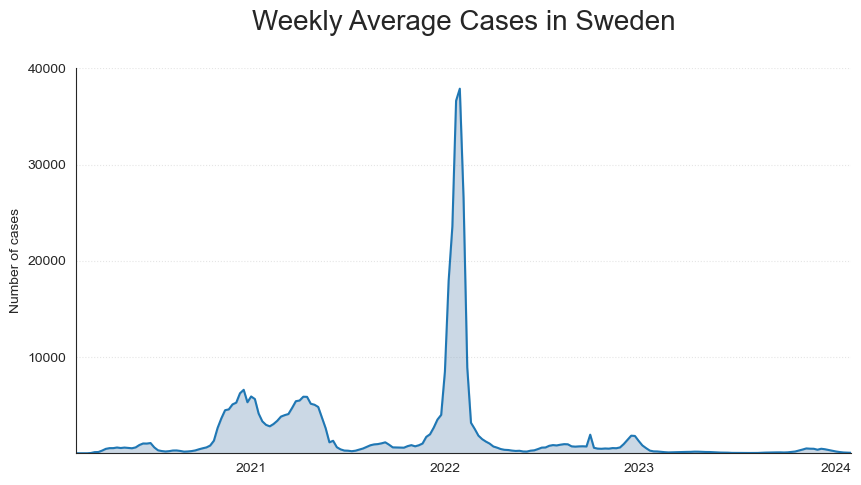

In [584]:
# 7 Day Average

fig, ax = plt.subplots(figsize=(10, 5))

weekly_mean = case_day["Riket"].resample("W").mean()

weekly_mean.plot()

# Fill the area under the line with a specific color
plt.fill_between(weekly_mean.index, weekly_mean, color=bob_ross_palette[1], alpha=0.4)

plt.ylim(bottom=0)
plt.yticks(range(10000, int(weekly_mean.max()) + 10000, 10000))

plt.grid(axis='y', linestyle=':', alpha=0.5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title("Weekly Average Cases in Sweden\n", size=20)
plt.ylabel("Number of cases")

plt.savefig("one.png", dpi= 300)

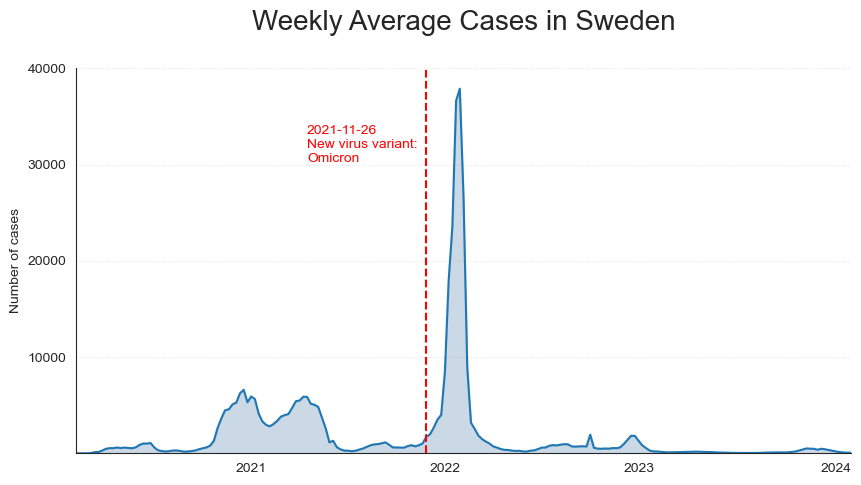

In [585]:
# 7 Day Average

fig, ax = plt.subplots(figsize=(10, 5))

weekly_mean = case_day["Riket"].resample("W").mean()

weekly_mean.plot()

# Fill the area under the line with a specific color
plt.fill_between(weekly_mean.index, weekly_mean, color=bob_ross_palette[1], alpha=0.4)

plt.ylim(bottom=0)
plt.yticks(range(10000, int(weekly_mean.max()) + 10000, 10000))

plt.grid(axis='y', linestyle=':', alpha=0.5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.axvline(pd.Timestamp('2021-11-26'),color='red', linestyle= '--',)

plt.text(pd.Timestamp('2021-04-16'), 30000, '2021-11-26\nNew virus variant:\nOmicron', 
         verticalalignment='bottom', size= 10, color= 'red')

plt.title("Weekly Average Cases in Sweden\n", size=20)
plt.ylabel("Number of cases")

plt.savefig("one.png", dpi= 300)

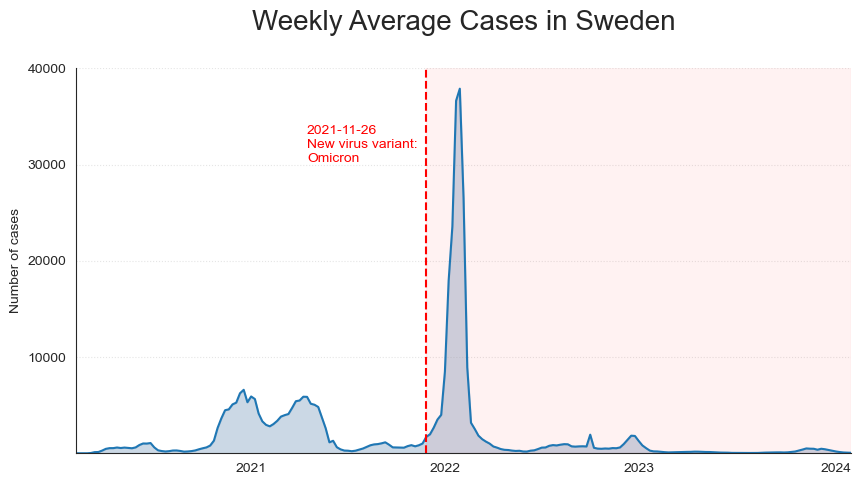

In [761]:
# 7 Day Average

fig, ax = plt.subplots(figsize=(10, 5))

weekly_mean = case_day["Riket"].resample("W").mean()

weekly_mean.plot()

# Fill the area under the line with a specific color
plt.fill_between(weekly_mean.index, weekly_mean, color=bob_ross_palette[1], alpha=0.4)

plt.ylim(bottom=0)
plt.yticks(range(10000, int(weekly_mean.max()) + 10000, 10000))

plt.grid(axis='y', linestyle=':', alpha=0.5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.axvline(pd.Timestamp('2021-11-26'),color='red', linestyle= '--',)

plt.text(pd.Timestamp('2021-04-16'), 30000, '2021-11-26\nNew virus variant:\nOmicron', 
         verticalalignment='bottom', size= 10, color= 'red')

ax.axvspan("2021-11-26", "2024-02-04", ymin=0, ymax=500, color='red', alpha=0.05)  # Example date span

plt.title("Weekly Average Cases in Sweden\n", size=20)
plt.ylabel("Number of cases")

plt.savefig("one.png", dpi= 300)

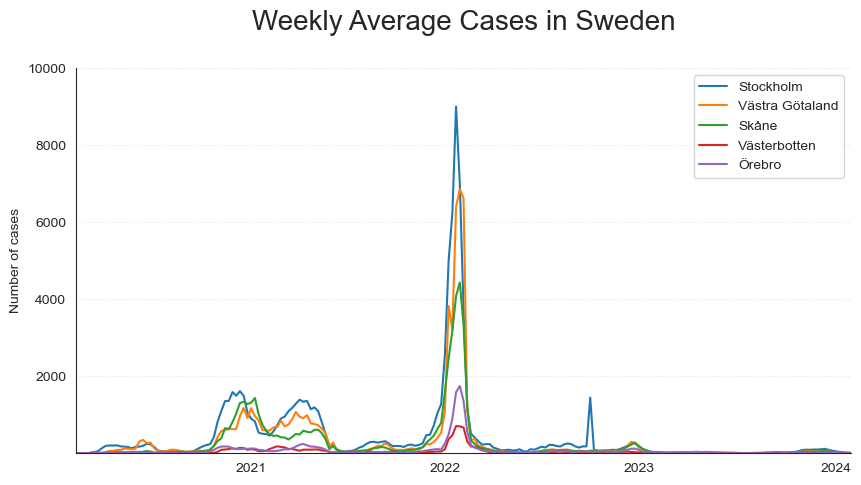

In [587]:
# Resample the data on a weekly basis and compute the mean
weekly_mean = case_day.resample("W").mean()

# Plotting
fig, ax = plt.subplots(figsize=(10, 5))

for column in ["Stockholm", "Västra Götaland", "Skåne", "Västerbotten", "Örebro"]:
    
    weekly_mean[column].plot(label=column)

# Set the bottom limit of the y-axis to 0
plt.ylim(bottom=0)

plt.yticks(range(2000, 10001, 2000))

# Draw weakly visible dotted lines for each tick
plt.grid(axis='y', linestyle=':', alpha=0.5)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title("Weekly Average Cases in Sweden\n", size= 20)
plt.ylabel("Number of cases")

plt.legend(loc='upper right')

plt.savefig("one.png", dpi= 300)

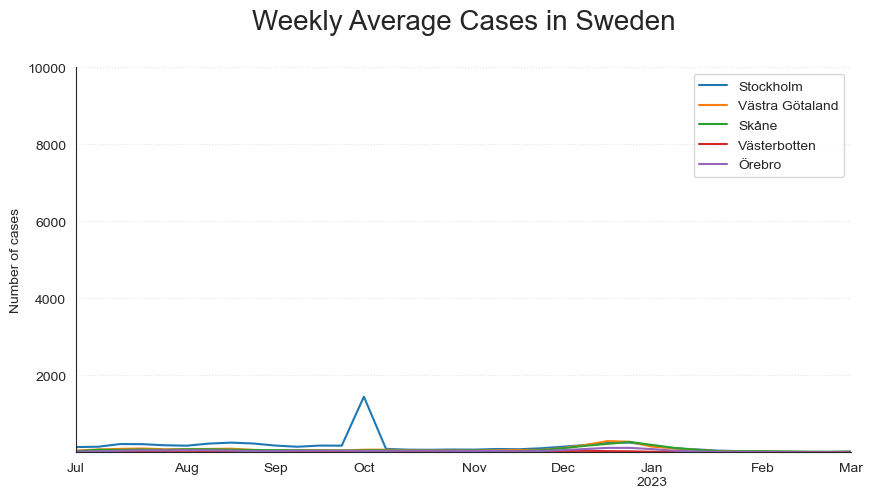

In [588]:
# Resample the data on a weekly basis and compute the mean
weekly_mean = case_day.loc["2022-07-01": "2023-03-01"].resample("W").mean()

# Plotting
fig, ax = plt.subplots(figsize=(10, 5))

for column in ["Stockholm", "Västra Götaland", "Skåne", "Västerbotten", "Örebro"]:
    
    weekly_mean[column].plot(label=column)

# Set the bottom limit of the y-axis to 0
plt.ylim(bottom=0)

plt.yticks(range(2000, 10001, 2000))

# Draw weakly visible dotted lines for each tick
plt.grid(axis='y', linestyle=':', alpha=0.5)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title("Weekly Average Cases in Sweden\n", size=20)
plt.ylabel("Number of cases")

plt.legend(loc='upper right')

plt.savefig("one.png", dpi= 300)

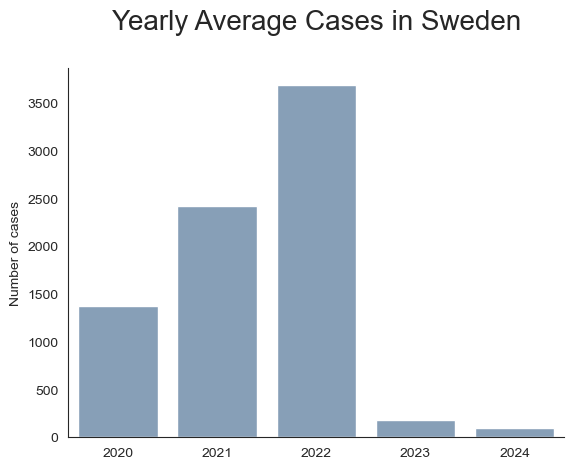

In [589]:
a = case_day["Riket"].resample("Y", kind="period").mean()
a = a.reset_index()

sns.barplot(data=a, x="index", y="Riket", color=bob_ross_palette[1])

plt.title("Yearly Average Cases in Sweden\n", size= 20)
plt.ylabel("Number of cases")

sns.despine(left=False)

plt.xlabel("")


plt.savefig("one.png", dpi= 300)

In [421]:
two_cols = ['#7f9fbf', '#ff8f5b']

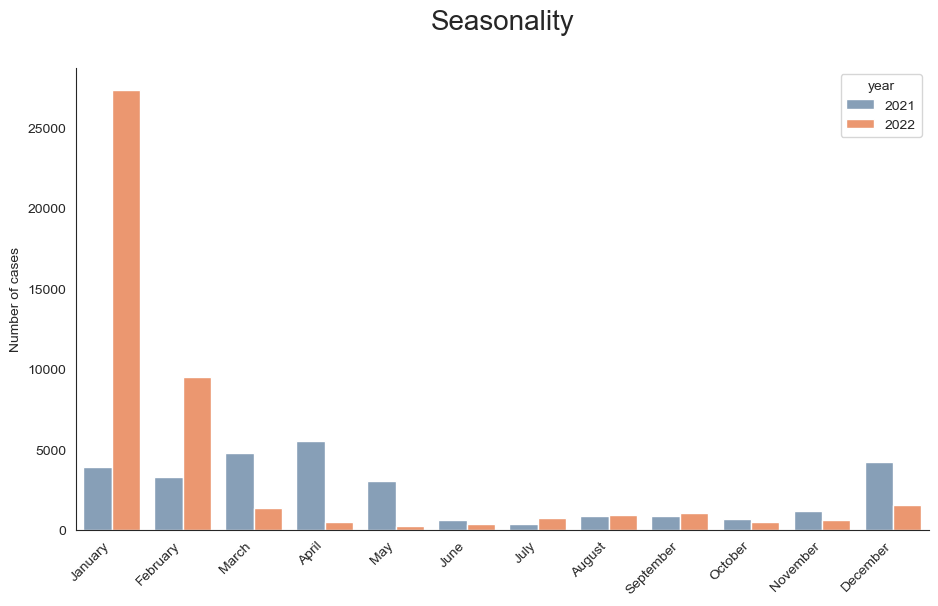

In [784]:
fig, ax = plt.subplots(figsize=(11, 6))

a = case_day["Riket"].resample("M", kind="period").mean()
a = a.reset_index()
a['month'] = a['index'].dt.strftime('%B')
a['year'] = a['index'].dt.strftime('%Y')

order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

sns.barplot(data= a.loc[a["year"].isin(["2021", "2022"])], x="month", y="Riket", errorbar=None, order=order, hue= "year", palette=two_cols)

plt.xticks(rotation=45, ha='right')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title("Seasonality\n", size=20)

plt.ylabel("Number of cases")
plt.xlabel("")

plt.savefig("one.png", dpi= 300)

# `cov_case_sex_region_week` dataset

In [149]:
# Read files

antal_kvinnor = pd.read_excel('cov_case_sex_region_week.xlsx', sheet_name='antal_kvinnor')
antal_män = pd.read_excel('cov_case_sex_region_week.xlsx', sheet_name='antal_män')
per100_kvinnor = pd.read_excel('cov_case_sex_region_week.xlsx', sheet_name='per100_kvinnor')
per100_män = pd.read_excel('cov_case_sex_region_week.xlsx', sheet_name='per100_män')

In [150]:
week_strings = antal_kvinnor.T.index[1:]

In [151]:
# Custom function to convert week strings to datetime objects
def week_to_datetime(week_string):
    year, week_num = week_string.split(' v ')
    # Get the Monday of the ISO week
    return pd.to_datetime(f'{year}-W{week_num}-1', format='%Y-W%W-%w')

# Convert week strings to datetime objects
week_dates = [week_to_datetime(week_string) for week_string in week_strings]

In [153]:
# Set Index as Region and Transpose

antal_kvinnor = antal_kvinnor.set_index("Region").T
antal_män = antal_män.set_index("Region").T
per100_kvinnor = per100_kvinnor.set_index("Region").T
per100_män = per100_män.set_index("Region").T

In [155]:
# Change dates to date_time with custom function

antal_kvinnor.index = week_dates
antal_män.index = week_dates
per100_kvinnor.index = week_dates
per100_män.index = week_dates

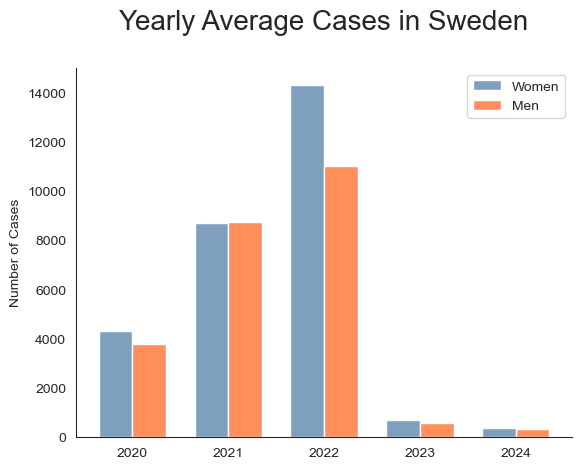

In [600]:
# Resample antal_män["Riket"] and antal_kvinnor["Riket"] on a yearly basis and compute the mean
antal_män_riket_yearly_mean = antal_män["Riket"].resample("Y", kind="period").mean()
antal_kvinnor_riket_yearly_mean = antal_kvinnor["Riket"].resample("Y", kind="period").mean()

# Set the width of each bar
bar_width = 0.35

# Define the x-axis positions for the bars
x = np.arange(len(antal_män_riket_yearly_mean))

# Plot antal_kvinnor["Riket"] as bar plot
plt.bar(x - bar_width/2, antal_kvinnor_riket_yearly_mean, color=two_cols[0], width=bar_width, label="Kvinnor")

# Plot antal_män["Riket"] as another bar plot side by side
plt.bar(x + bar_width/2, antal_män_riket_yearly_mean, color=two_cols[1], width=bar_width, label="Män")

plt.xlabel("")
plt.ylabel("Number of Cases")
plt.title("Yearly Average Cases in Sweden\n", size= 20)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the x-axis labels as the years
plt.xticks(x, antal_män_riket_yearly_mean.index)

# Show the legend
plt.legend(labels= ["Women", "Men"])

# Show the plot
plt.savefig("one.png", dpi= 300)

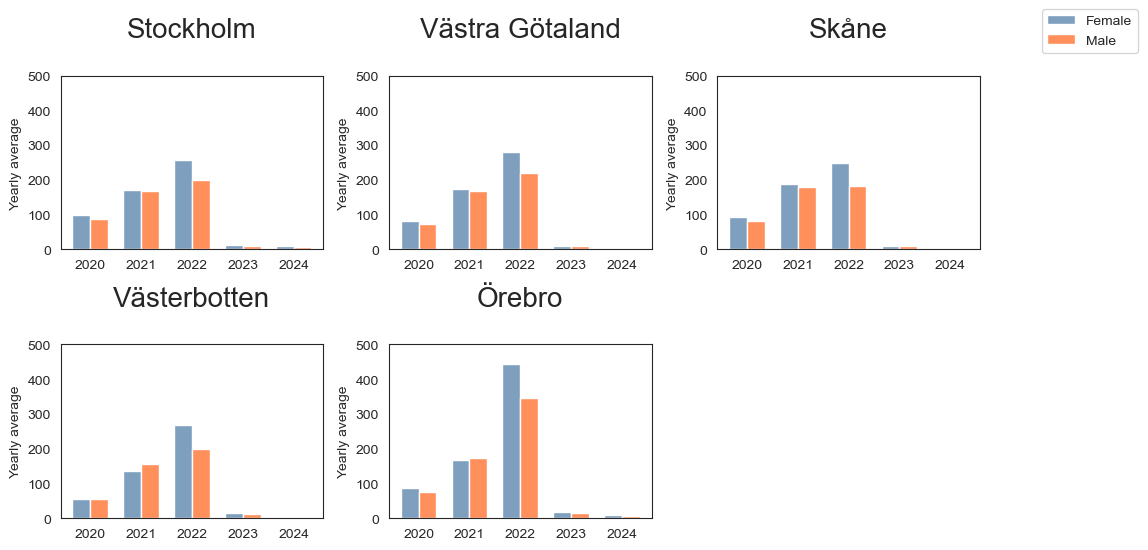

In [607]:
# List of regions
regions = ["Stockholm", "Västra Götaland", "Skåne", "Västerbotten", "Örebro"]

# Set the width of each bar
bar_width = 0.35

# Create a figure and a grid of subplots (3 rows, 2 columns)
fig, axs = plt.subplots(3, 3, figsize=(10,8 ))

# Flatten the 3x2 grid of subplots for easy iteration
axs = axs.flatten()

# Collect handles and labels for the legend from the first subplot
handles, labels = [], []

# Iterate over each region and plot it in a subplot
for i, region in enumerate(regions):
    # Compute the yearly mean for antal_män and antal_kvinnor for the current region
    per100men_yearly_mean = per100_män[region].resample("Y", kind="period").mean()
    per100women_yearly_mean = per100_kvinnor[region].resample("Y", kind="period").mean()

    # Define the x-axis positions for the bars
    x = np.arange(len(per100men_yearly_mean))

    # Plot antal_kvinnor for the current region as bar plot
    bars1 = axs[i].bar(x - bar_width/2, per100women_yearly_mean, color=two_cols[0], width=bar_width, label="Female")

    # Plot antal_män for the current region as another bar plot side by side
    bars2 = axs[i].bar(x + bar_width/2, per100men_yearly_mean, color=two_cols[1], width=bar_width, label="Male")

    # Collect handles and labels from the first subplot
    if i == 0:
        handles1, labels1 = axs[i].get_legend_handles_labels()

    axs[i].set_xlabel("")
    axs[i].set_ylabel("Yearly average", size= 10)
    axs[i].set_title(f"{region}\n", size = 20)

    # Set the x-axis labels as the years
    axs[i].set_xticks(x)
    axs[i].set_xticklabels(per100men_yearly_mean.index)
    
    axs[i].set_ylim(0, 500)

# Remove any unused subplots
for j in range(len(regions), len(axs)):
    fig.delaxes(axs[j])

# Adjust layout
plt.tight_layout()


# Create the legend outside the grid of subplots using handles and labels from the first subplot
fig.legend(handles1, labels1, loc="upper right", bbox_to_anchor=(1.15, 1))

# Show the plot
plt.savefig("one.png", dpi= 300)


# `cov_iva_death_region_week` dataset

In [42]:
antal_iva = pd.read_excel("cov_iva_death_region_week.xlsx", sheet_name= 'antal_new_iva')
per100_new_iva = pd.read_excel("cov_iva_death_region_week.xlsx", sheet_name= 'per100_new_iva')
antal_dead = pd.read_excel("cov_iva_death_region_week.xlsx", sheet_name= 'antal_dead')
per100_dead = pd.read_excel("cov_iva_death_region_week.xlsx", sheet_name= 'per100_dead')

In [43]:
antal_iva = antal_iva.set_index("Region").T
per100_new_iva = per100_new_iva.set_index("Region").T
antal_dead = antal_dead.set_index("Region").T
per100_dead = per100_dead.set_index("Region").T

In [44]:
week_strings = antal_iva.index

# Custom function to convert week strings to datetime objects
def week_to_datetime(week_string):
    year, week_num = week_string.split(' v ')
    # Get the Monday of the ISO week
    return pd.to_datetime(f'{year}-W{week_num}-1', format='%Y-W%W-%w')

# Convert week strings to datetime objects
week_dates = [week_to_datetime(week_string) for week_string in week_strings]

In [45]:
antal_iva.index = week_dates
per100_new_iva.index = week_dates
antal_dead.index = week_dates
per100_dead.index = week_dates

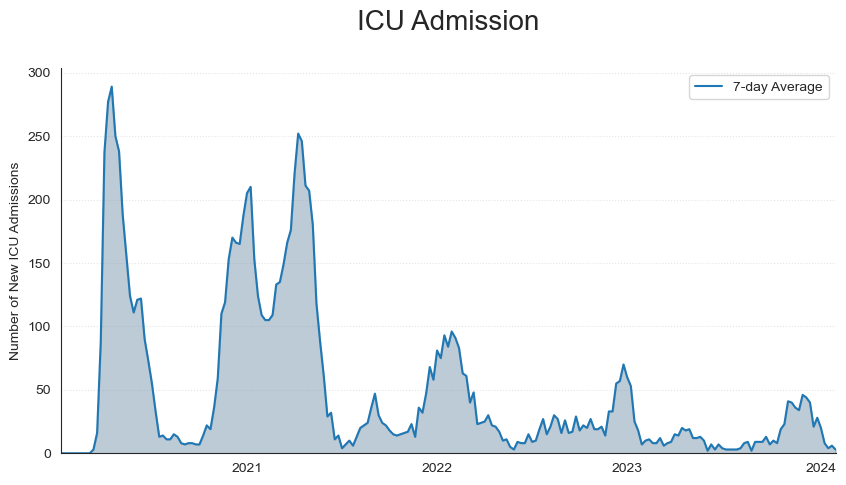

In [612]:
# 7 Day Average

fig, ax = plt.subplots(figsize=(10, 5))

weekly_mean = antal_iva["Riket"].resample("W", kind="period").mean()

weekly_mean.plot()

# Fill the area under the line with a specific color
plt.fill_between(weekly_mean.index, weekly_mean, color=bob_ross_palette[0], alpha=0.4)

plt.ylim(bottom=0)
#plt.yticks(range(10000, int(weekly_mean.max()) + 10000, 10000))

plt.grid(axis='y', linestyle=':', alpha=0.5)

plt.xlabel("")
plt.ylabel("Number of Cases")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title('ICU Admission\n', size=20)

plt.xlabel("")
plt.ylabel("Number of New ICU Admissions")
plt.legend(labels = ["7-day Average"])

plt.show()

In [ ]:
# Look at different between regions or na?

# `iva_dead_age_groups` dataset

In [47]:
age0_49 = pd.read_excel("iva_dead_age_groups.xlsx", sheet_name= 'age0_49')
age50_69 = pd.read_excel("iva_dead_age_groups.xlsx", sheet_name= 'age50_69')
age70 = pd.read_excel("iva_dead_age_groups.xlsx", sheet_name= 'age70')

In [48]:
age0_49 = age0_49.set_index("Groups").T
age50_69 = age50_69.set_index("Groups").T
age70 = age70.set_index("Groups").T

In [49]:
week_strings = age0_49.index

# Custom function to convert week strings to datetime objects
def week_to_datetime(week_string):
    year, week_num = week_string.split(' v ')
    # Get the Monday of the ISO week
    return pd.to_datetime(f'{year}-W{week_num}-1', format='%Y-W%W-%w')

# Convert week strings to datetime objects
week_dates = [week_to_datetime(week_string) for week_string in week_strings]

In [50]:
age0_49.index = week_dates
age50_69.index = week_dates
age70.index = week_dates

In [51]:
new_iva = pd.DataFrame(index = age0_49.index)

In [52]:
new_iva["age0_49"] = age0_49["new_iva"]
new_iva["age50_69"] = age50_69["new_iva"]
new_iva["age70"] = age70["new_iva"]

In [53]:
new_iva_per100 = pd.DataFrame(index = age0_49.index)

In [54]:
new_iva_per100["age0_49"] = age0_49["new_iva_per100"]
new_iva_per100["age50_69"] = age50_69["new_iva_per100"]
new_iva_per100["age70"] = age70["new_iva_per100"]

In [55]:
a_dead = pd.DataFrame(index = age0_49.index)

In [56]:
a_dead["age0_49"] = age0_49["antal_dead"]
a_dead["age50_69"] = age50_69["antal_dead"]
a_dead["age70"] = age70["antal_dead"]

In [57]:
a_dead_per100 = pd.DataFrame(index = age0_49.index)

In [58]:
a_dead_per100["age0_49"] = age0_49["antal_dead_per100"]
a_dead_per100["age50_69"] = age50_69["antal_dead_per100"]
a_dead_per100["age70"] = age70["antal_dead_per100"]

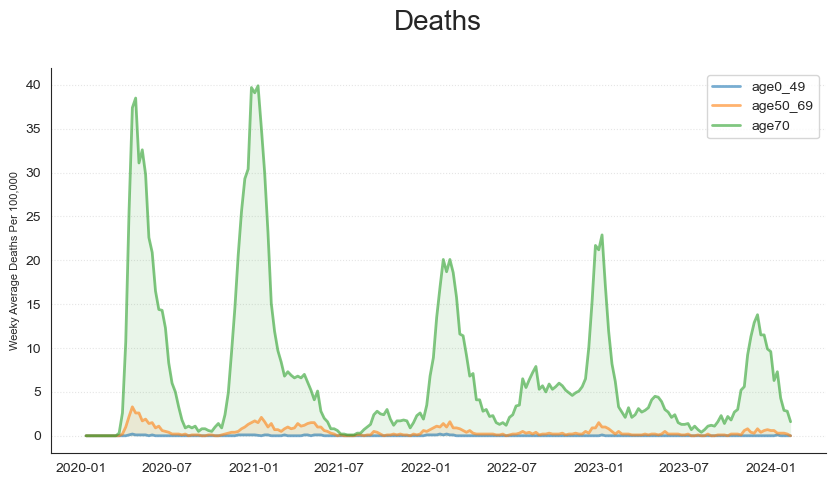

In [625]:
weekly_mean = a_dead_per100.resample("W").mean()

# Plotting
fig, ax = plt.subplots(figsize=(10, 5))

for column in a_dead_per100:
    # Plot with filled area under the line and low alpha
    plt.plot(weekly_mean.index, weekly_mean[column], label=column, alpha=0.6, linewidth=2)
    plt.fill_between(weekly_mean.index, weekly_mean[column], alpha=0.1)

# Draw weakly visible dotted lines for each tick
plt.grid(axis='y', linestyle=':', alpha=0.5)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title('Deaths\n', size= 20)
plt.ylabel("Weeky Average Deaths Per 100,000", size= 8)

plt.legend(loc='upper right')


plt.savefig("one.png", dpi= 300)

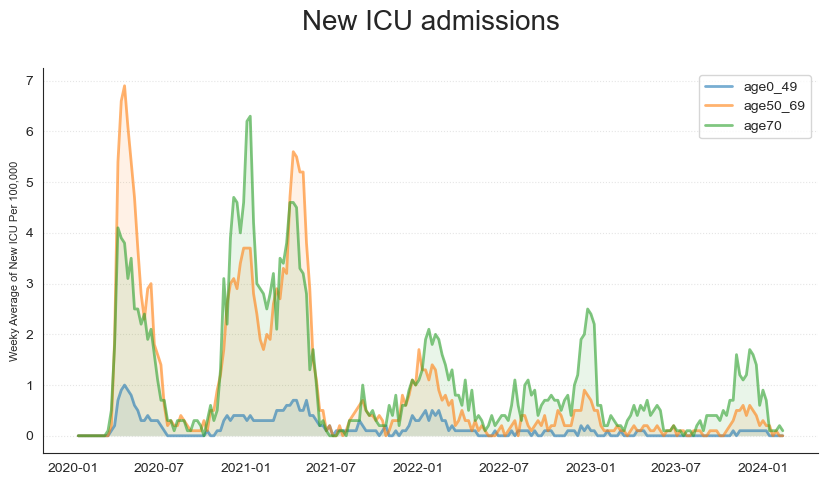

In [626]:
weekly_mean = new_iva_per100.resample("W").mean()

# Plotting
fig, ax = plt.subplots(figsize=(10, 5))

for column in new_iva_per100:
    # Plot with filled area under the line and low alpha
    plt.plot(weekly_mean.index, weekly_mean[column], label=column, alpha=0.6, linewidth=2)
    plt.fill_between(weekly_mean.index, weekly_mean[column], alpha=0.1)

# Draw weakly visible dotted lines for each tick
plt.grid(axis='y', linestyle=':', alpha=0.5)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title('New ICU admissions\n', size= 20)
plt.ylabel("Weeky Average of New ICU Per 100,000", size= 8)

plt.legend(loc='upper right')

plt.savefig("one.png", dpi= 300)

In [632]:
d = pd.DataFrame(index= new_iva.index, columns= ["ICU", "Death"])

In [633]:
d["ICU"] = new_iva["age70"]
d["Death"] = a_dead["age70"]

In [634]:
d = d.resample("M").mean()

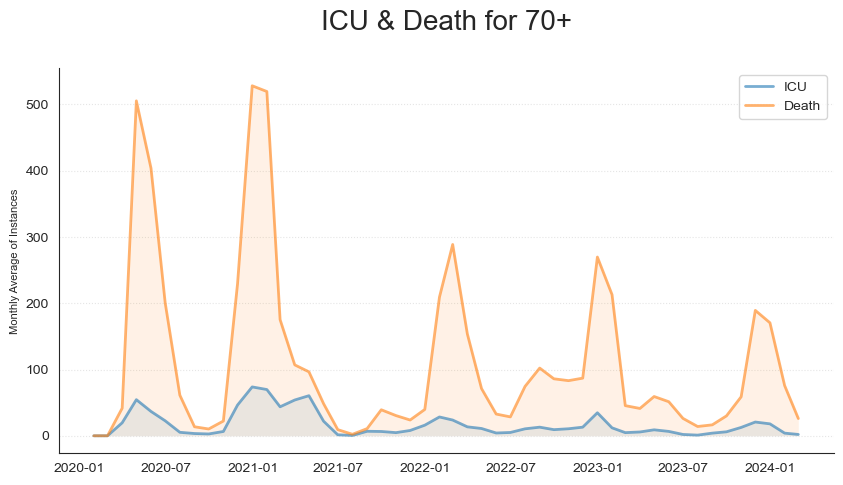

In [638]:
weekly_mean = d

# Plotting
fig, ax = plt.subplots(figsize=(10, 5))

for column in d:
    # Plot with filled area under the line and low alpha
    plt.plot(weekly_mean.index, weekly_mean[column], label=column, alpha=0.6, linewidth=2)
    plt.fill_between(weekly_mean.index, weekly_mean[column], alpha=0.1)

# Draw weakly visible dotted lines for each tick
plt.grid(axis='y', linestyle=':', alpha=0.5)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title('ICU & Death for 70+\n', size=20)
plt.ylabel("Monthly Average of Instances", size= 8)

plt.legend(loc='upper right')

plt.savefig("one.png", dpi= 300)

In [545]:
lst = [sum(a_dead["age70"]), sum(a_dead["age50_69"]), sum(a_dead["age0_49"]) ]

C:\Users\davwul\AppData\Local\Temp\ipykernel_29720\2365856839.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["70+", "50-69", "0-49"])


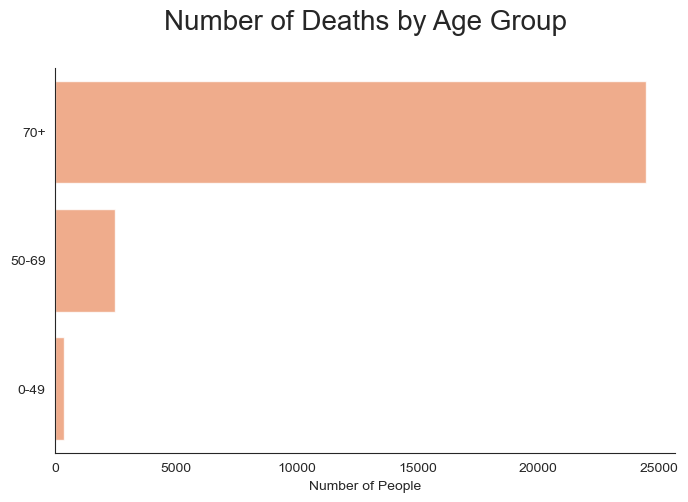

In [659]:
fig, ax = plt.subplots(figsize= (8,5))

sns.barplot(lst, orient="h", alpha= 0.8, color=bob_ross_palette[10])

ax.set_yticklabels(["70+", "50-69", "0-49"])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel("Number of People", size= 10)

plt.title("Number of Deaths by Age Group\n", size=20)

plt.savefig("one.png", dpi= 300)

 # `cov_vacc` dataset 

In [548]:
atleast_1 = pd.read_excel("cov_vacc.xlsx", sheet_name="1dos_vacc_andel")
more_2 = pd.read_excel("cov_vacc.xlsx", sheet_name="aktuell_dos_vacc_andel")

In [549]:
a = atleast_1.loc[atleast_1["Region"] == "00 Riket"]
a.drop(columns= ["Region", "Totalt 65+"], inplace= True)

C:\Users\davwul\AppData\Local\Temp\ipykernel_29720\2023138657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.drop(columns= ["Region", "Totalt 65+"], inplace= True)


In [550]:
b = more_2.loc[more_2["Region"] == "00 Riket"]
b.drop(columns= ["Region", "Totalt 65+"], inplace= True)

C:\Users\davwul\AppData\Local\Temp\ipykernel_29720\1743298598.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b.drop(columns= ["Region", "Totalt 65+"], inplace= True)


In [551]:
c = a.T
c = c.rename(columns = {0:"1dose"})

In [552]:
c["2ormore"] = b.T

In [553]:
tick_name = ["18", "18-49", "50-64", "65-79", "80+"]

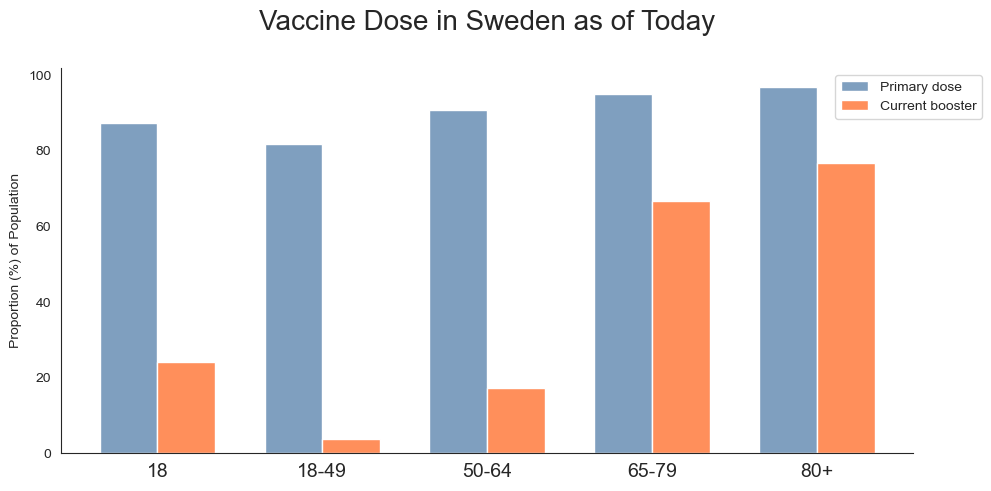

In [667]:
plt.figure(figsize= (11,5))

bar_width = 0.35

# Define the x-axis positions for the bars
x = np.arange(len(c))

# Plot antal_kvinnor["Riket"] as bar plot
plt.bar(x - bar_width/2, c["1dose"], color=two_cols[0], width=bar_width, label="Primary dose")

# Plot antal_män["Riket"] as another bar plot side by side
plt.bar(x + bar_width/2, c["2ormore"], color=two_cols[1], width=bar_width, label="Current booster")

plt.xlabel("")
plt.ylabel("Proportion (%) of Population")
plt.title("Vaccine Dose in Sweden as of Today\n", size=20)

# Set the x-axis labels as the years
plt.xticks(x, tick_name, size=14)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the legend
plt.legend()

plt.legend(loc='upper left', bbox_to_anchor=(0.90, 1))

# Show the plot
plt.savefig("one.png", dpi= 300)

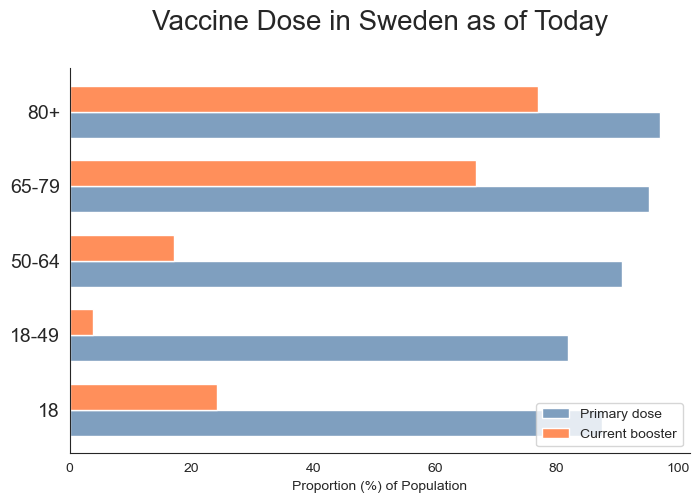

In [671]:
plt.figure(figsize=(8, 5))

bar_width = 0.35

# Define the y-axis positions for the bars (swapped x and y)
y = np.arange(len(c))

# Plot antal_kvinnor["Riket"] as bar plot
plt.barh(y - bar_width/2, c["1dose"], color=two_cols[0], height=bar_width, label="Primary dose")

# Plot antal_män["Riket"] as another bar plot side by side
plt.barh(y + bar_width/2, c["2ormore"], color=two_cols[1], height=bar_width, label="Current booster")

plt.ylabel("")
plt.xlabel("Proportion (%) of Population")
plt.title("Vaccine Dose in Sweden as of Today\n", size=20)

# Set the y-axis labels as the years (swapped x and y)
plt.yticks(y, tick_name, size=14)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the legend
plt.legend(loc='lower right')

# Show the plot
plt.savefig("one.png", dpi=300)


# Folkhälsomyndighetens tidslinje och annat

### * 2020-12-27
I dag vaccineras de första personerna i Sverige mot covid-19. Under veckan väntas regionerna få påfyllning med nya doser.

### * 2020-03-11

Det första dödsfallet med covid-19 i Sverige rapporteras.

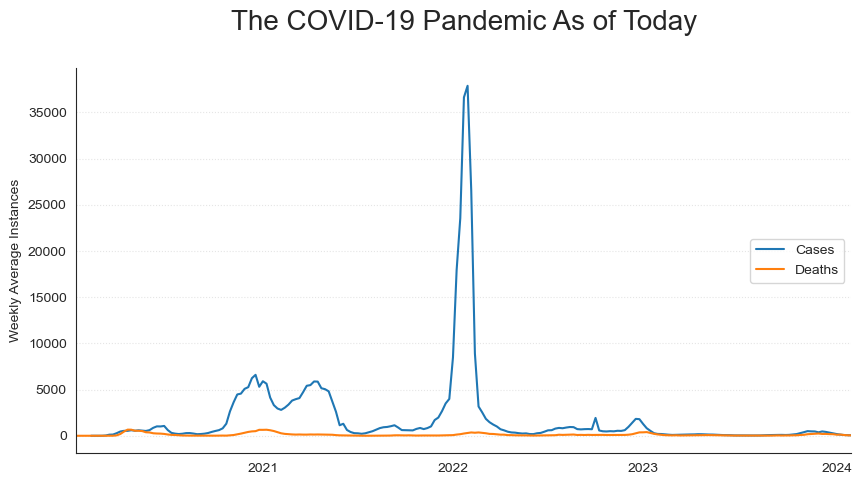

In [781]:
# Assuming case_day and antal_dead are your DataFrames

plt.figure(figsize= (10,5))

# Plot the data
ax = case_day["Riket"].resample("W").mean().plot()
antal_dead["Riket"].resample("W").mean().plot(ax=ax)

# Draw weakly visible dotted lines for each tick
plt.grid(axis='y', linestyle=':', alpha=0.5)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.ylabel("Weekly Average Instances")
plt.xlabel("")

#plt.axvline(pd.Timestamp('2020-01-13'),color='black', linestyle= '--',)

#plt.text(pd.Timestamp('2020-01-13'), 1750, '2020-01-13\nWHO: Pandemic\nno longer an emergency', verticalalignment='bottom', size= 8, weight="bold")

# Highlight the specific date span with a gray area
#ax.axvspan("2023-05-05", "2024-02-04", ymin=0, ymax=500, color='black', alpha=0.05)  # Example date span

plt.legend(labels=["Cases", "Deaths"], loc='right')

plt.title("The COVID-19 Pandemic As of Today\n", size= 20)

# Show the plot
plt.savefig("one.png", dpi= 300)

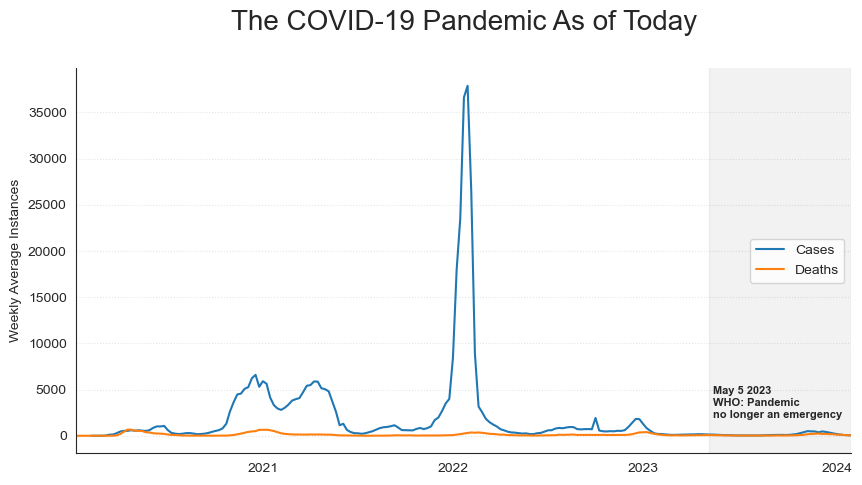

In [777]:
# Assuming case_day and antal_dead are your DataFrames

plt.figure(figsize= (10,5))

# Plot the data
ax = case_day["Riket"].resample("W").mean().plot()
antal_dead["Riket"].resample("W").mean().plot(ax=ax)

# Draw weakly visible dotted lines for each tick
plt.grid(axis='y', linestyle=':', alpha=0.5)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.ylabel("Weekly Average Instances")
plt.xlabel("")

#plt.axvline(pd.Timestamp('2023-05-05'),color='black', linestyle= '--',)

plt.text(pd.Timestamp('2023-05-08'), 1750, 'May 5 2023\nWHO: Pandemic\nno longer an emergency', 
         verticalalignment='bottom', size= 8, weight="bold")

# Highlight the specific date span with a gray area
ax.axvspan("2023-05-05", "2024-02-04", ymin=0, ymax=500, color='black', alpha=0.05)  # Example date span

plt.legend(labels=["Cases", "Deaths"], loc='right')

plt.title("The COVID-19 Pandemic As of Today\n", size= 20)

# Show the plot
plt.savefig("one.png", dpi= 300)

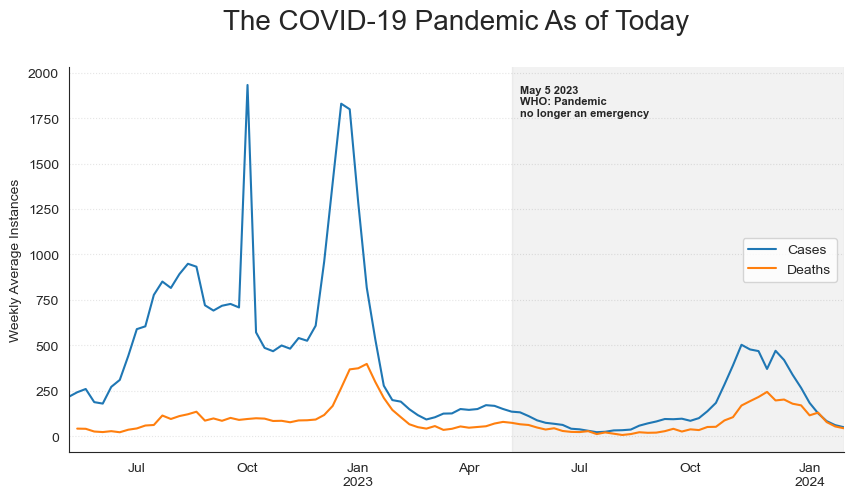

In [693]:
# Assuming case_day and antal_dead are your DataFrames

plt.figure(figsize= (10,5))

# Plot the data
ax = case_day.loc["2022-05-05": "2024-02-04"]["Riket"].resample("W").mean().plot()
antal_dead.loc["2022-05-05": "2024-02-04"]["Riket"].resample("W").mean().plot(ax=ax)

# Draw weakly visible dotted lines for each tick
plt.grid(axis='y', linestyle=':', alpha=0.5)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.ylabel("Weekly Average Instances")
plt.xlabel("")

#plt.axvline(pd.Timestamp('2023-05-05'),color='black', linestyle= '--',)

plt.text(pd.Timestamp('2023-05-08'), 1750, 'May 5 2023\nWHO: Pandemic\nno longer an emergency', 
         verticalalignment='bottom', size= 8, weight="bold")

# Highlight the specific date span with a gray area
ax.axvspan("2023-05-05", "2024-02-04", ymin=0, ymax=500, color='black', alpha=0.05)  # Example date span

plt.legend(labels=["Cases", "Deaths"], loc='right')

plt.title("The COVID-19 Pandemic As of Today\n", size= 20)

# Show the plot
plt.savefig("one.png", dpi= 300)

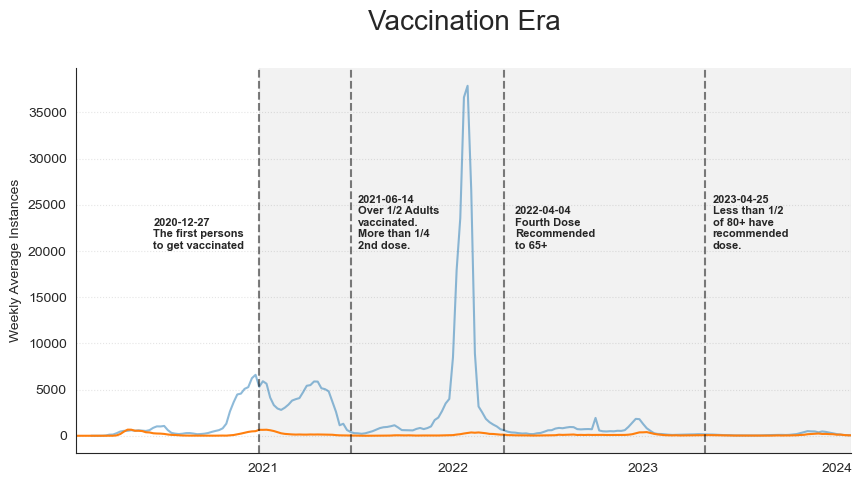

In [694]:
# Assuming case_day and antal_dead are your DataFrames

plt.figure(figsize= (10,5))

# Plot the data
ax = case_day["Riket"].resample("W").mean().plot(alpha=0.5)
antal_dead["Riket"].resample("W").mean().plot(ax=ax)

# Draw weakly visible dotted lines for each tick
plt.grid(axis='y', linestyle=':', alpha=0.5)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.title("Vaccination Era\n", size=20)

plt.ylabel("Weekly Average Instances")
plt.xlabel("")

plt.axvline(pd.Timestamp('2020-12-27'),color='black', linestyle= '--',alpha=0.5)
plt.text(pd.Timestamp('2020-06-07'), 20000, '2020-12-27\nThe first persons\nto get vaccinated', 
         verticalalignment='bottom', size= 8, weight='bold')

plt.axvline(pd.Timestamp('2021-06-14'),color='black', linestyle= '--',alpha=0.5)
plt.text(pd.Timestamp('2021-06-30'), 20000, '2021-06-14\nOver 1/2 Adults\nvaccinated.\nMore than 1/4\n2nd dose.', 
         verticalalignment='bottom', size= 8, weight='bold')

plt.axvline(pd.Timestamp('2022-04-04'),color='black', linestyle= '--',alpha=0.5)
plt.text(pd.Timestamp('2022-04-30'), 20000, '2022-04-04\nFourth Dose\nRecommended\nto 65+', 
         verticalalignment='bottom', size= 8, weight='bold')


plt.axvline(pd.Timestamp('2023-04-25'),color='black', linestyle= '--',alpha=0.5)
plt.text(pd.Timestamp('2023-05-10'), 20000, '2023-04-25\nLess than 1/2\nof 80+ have\nrecommended\ndose.', 
         verticalalignment='bottom', size= 8, weight='bold')


# Highlight the specific date span with a gray area
ax.axvspan("2020-12-27", "2024-02-04", ymin=0, ymax=500, color='black', alpha=0.05)  # Example date span

# Show the plot
plt.savefig("one.png", dpi=300)

# Kommun compaison

In [790]:
kommun_1dos = pd.read_excel("cov_vacc.xlsx", sheet_name="kommun_1dos")
kommun_1dos['Kommun'] = kommun_1dos['Kommun'].apply(lambda x: re.sub(r'\d+', '', x).strip())

In [794]:
atleast_1 = pd.read_excel("cov_vacc.xlsx", sheet_name="kommun_aktuell")
atleast_1['Kommun'] = atleast_1['Kommun'].apply(lambda x: re.sub(r'\d+', '', x))

C:\Users\davwul\AppData\Local\Temp\ipykernel_29720\357175227.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.drop(columns="Kommun", inplace=True)


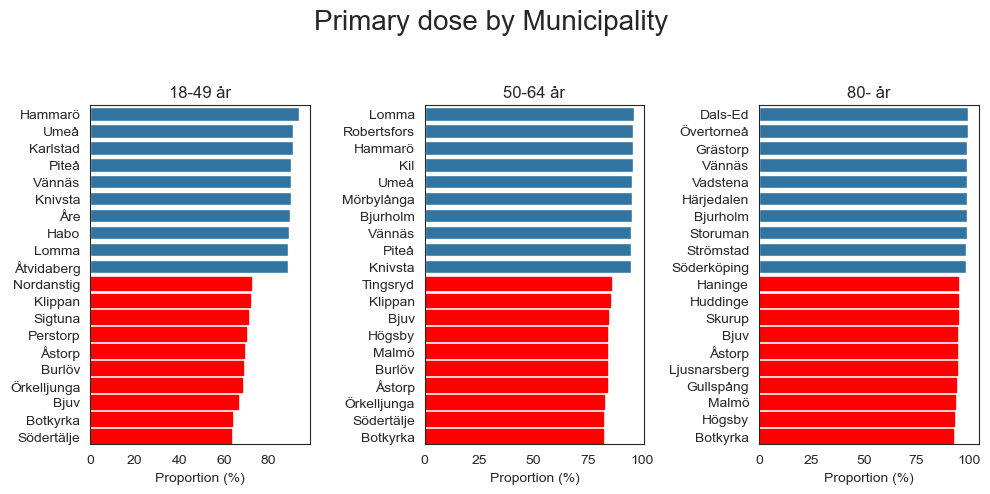

In [787]:
import matplotlib.pyplot as plt
import seaborn as sns

a = kommun_1dos[["Kommun", "18-49 år", "50-64 år", "80- år"]]
a.index = a["Kommun"]
a.drop(columns="Kommun", inplace=True)

fig, axes = plt.subplots(1, 3, figsize=(10,5))

for i, (col, ax) in enumerate(zip(a.columns, axes)):
    y = a[col]
    hi10 = y.sort_values(ascending=False).nlargest(10).index
    lo10 = y.nsmallest(10).sort_values(ascending=False).index
    
    s = min(y.sort_values(ascending=False).nlargest(10))
    
    b = a.loc[hi10]
    c = a.loc[lo10]
    e = pd.concat([b, c], axis=0)
    
    sns.barplot(data=e, y=e.index, x=col, orient="h", ax=ax)  # Use index as y
      # Apply x-axis limit to the current plot
    
    for bar in ax.patches:
        if bar.get_width() < s:  # Specify your condition here
            bar.set_color('red')    # Set the desired color
    
    ax.set_ylabel("") 
    ax.set_xlabel("Proportion (%)")
    ax.set_title(col)  # Set the title
    
plt.suptitle("Primary dose by Municipality \n", size=20)
    
plt.tight_layout()  # Adjust layout
plt.savefig("one.png", dpi=300)

C:\Users\davwul\AppData\Local\Temp\ipykernel_29720\3351959591.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.drop(columns="Kommun", inplace=True)


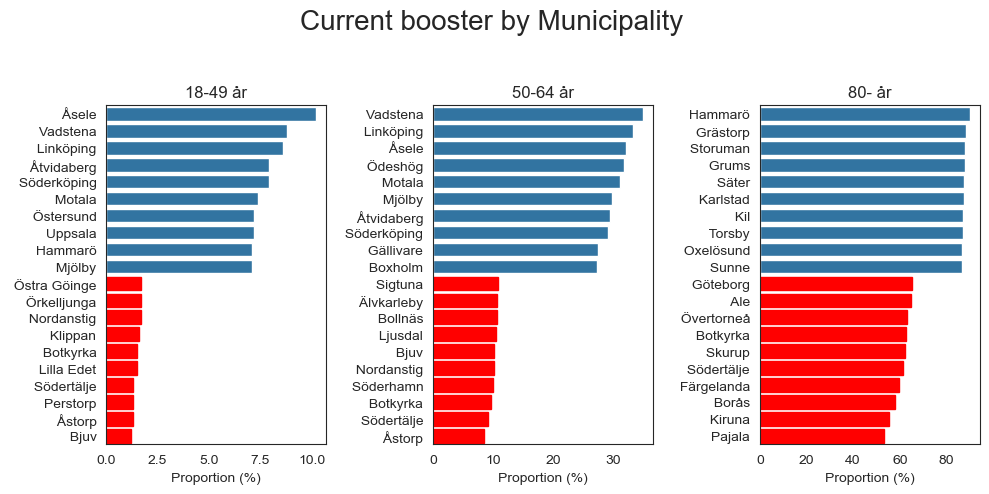

In [796]:
import matplotlib.pyplot as plt
import seaborn as sns

a = atleast_1[["Kommun", "18-49 år", "50-64 år", "80- år"]]
a.index = a["Kommun"]
a.drop(columns="Kommun", inplace=True)

fig, axes = plt.subplots(1, 3, figsize=(10,5))

for i, (col, ax) in enumerate(zip(a.columns, axes)):
    y = a[col]
    hi10 = y.sort_values(ascending=False).nlargest(10).index
    lo10 = y.nsmallest(10).sort_values(ascending=False).index
    
    s = min(y.sort_values(ascending=False).nlargest(10))
    
    b = a.loc[hi10]
    c = a.loc[lo10]
    e = pd.concat([b, c], axis=0)
    
    sns.barplot(data=e, y=e.index, x=col, orient="h", ax=ax)  # Use index as y
      # Apply x-axis limit to the current plot
    
    for bar in ax.patches:
        if bar.get_width() < s:  # Specify your condition here
            bar.set_color('red')    # Set the desired color
    
    ax.set_ylabel("") 
    ax.set_xlabel("Proportion (%)")
    ax.set_title(col)  # Set the title
    
plt.suptitle("Current booster by Municipality \n", size=20)
    
plt.tight_layout()  # Adjust layout
plt.savefig("one.png", dpi=300)

# Överdödlighet beräkning

## Data från SCB.se

In [159]:
df = pd.read_excel('all_dead.xlsx', index_col=[0, 1])

In [160]:
df = df.T

In [161]:
# Assuming df is your DataFrame with the index in the format "2010V01"

# Extract the year and week from the index
df['Year'] = df.index.str[:4]
df['Week'] = df.index.str[5:]

# Convert the 'Year' and 'Week' columns to integers
df['Year'] = df['Year'].astype(int)
df['Week'] = df['Week'].astype(int)

# Convert the year and week to datetime
df['Date'] = pd.to_datetime(df['Year'].astype(str) + df['Week'].astype(str) + '1', format='%Y%W%w')

# Drop the temporary columns if needed
df.drop(['Year', 'Week'], axis=1, inplace=True)

# Now, the 'Date' column will contain the datetime values


In [162]:
df.index = df["Date"]

In [163]:
df.drop(columns= "Date", inplace= True)

In [164]:
df.loc["2016-01-01": "2019-12-31"].groupby(df.loc["2016-01-01": "2019-12-31"].index.month).sum()

Age  0-34 år         35-59 år         60-69 år         70-79 år          \
Sex      män kvinnor      män kvinnor      män kvinnor      män kvinnor   
Date                                                                      
1        305     192     1179     772     2116    1514     4563    3399   
2        292     162     1067     726     1921    1319     4003    3120   
3        289     170      926     645     1674    1164     3813    2809   
4        306     173     1033     664     1845    1298     4012    2946   
5        324     178     1011     666     1700    1180     3719    2713   
6        291     137      890     615     1452    1084     3228    2435   
7        379     187     1085     686     1836    1240     3859    2967   
8        305     149      943     607     1589    1070     3356    2667   
9        264     134      882     640     1627    1146     3539    2640   
10       311     169     1038     761     1939    1373     4111    3110   
11       262     146      894     597     1565    1078     3504    2661   
12       273     136      938     687     1716    1216     3853    2923   

Age  80-89 år         90+ år         totalt          
Sex       män kvinnor    män kvinnor    män kvinnor  
Date                                                 
1        6288    6850   3271    6423  17722   19150  
2        5586    6104   2806    5721  15675   17152  
3        4973    5467   2513    5054  14188   15309  
4        5286    5624   2660    5225  15142   15930  
5        4818    5131   2372    4617  13944   14485  
6        4080    4344   1981    3939  11922   12554  
7        4946    5406   2444    4836  14549   15322  
8        4398    4711   2132    4334  12723   13538  
9        4617    4663   2217    4296  13146   13519  
10       5346    5533   2846    5136  15591   16082  
11       4574    4954   2398    4365  13197   13801  
12       5309    5508   2736    5279  14825   15749

In [166]:
# Filter data for the years 2015-2019
df_filtered = df['2015':'2019']

# Group by month and sum the values for each month
monthly_ave = df_filtered.groupby(df_filtered.index.month).mean()
monthly_ave

Age     0-34 år              35-59 år               60-69 år             \
Sex         män    kvinnor        män    kvinnor         män    kvinnor   
Date                                                                      
1     16.826087   9.956522  63.782609  41.173913  111.434783  80.652174   
2     17.523810   9.333333  63.904762  42.666667  115.142857  79.428571   
3     18.523810  10.238095  60.571429  42.095238  108.619048  76.190476   
4     17.090909   9.727273  59.454545  37.090909  107.590909  73.909091   
5     18.181818   9.590909  59.136364  37.409091   97.272727  66.818182   
6     19.380952   8.809524  56.190476  38.047619   93.047619  69.095238   
7     19.913043  10.173913  58.043478  36.782609   99.217391  67.130435   
8     18.181818   8.545455  55.818182  36.954545   95.636364  64.863636   
9     15.571429   8.761905  55.571429  38.428571   96.619048  69.142857   
10    16.826087   8.826087  55.695652  39.565217  103.000000  72.956522   
11    17.190476   9.428571  56.000000  37.380952  100.000000  69.238095   
12    16.476190   8.476190  55.857143  40.523810  103.904762  73.666667   

Age     70-79 år                80-89 år                  90+ år              \
Sex          män     kvinnor         män     kvinnor         män     kvinnor   
Date                                                                           
1     237.043478  177.217391  328.739130  365.347826  169.782609  339.173913   
2     233.666667  179.095238  333.476190  362.142857  167.714286  337.714286   
3     236.000000  173.380952  316.428571  351.000000  160.476190  320.285714   
4     223.090909  164.090909  295.863636  315.409091  146.818182  293.636364   
5     206.863636  149.500000  269.863636  288.318182  132.409091  259.363636   
6     201.285714  151.857143  258.761905  278.095238  123.476190  247.000000   
7     201.913043  154.434783  261.260870  284.260870  125.826087  253.739130   
8     198.818182  152.090909  258.500000  275.909091  123.727273  253.181818   
9     208.285714  154.142857  271.380952  273.714286  130.428571  252.428571   
10    213.521739  160.304348  282.565217  292.652174  145.304348  266.347826   
11    217.142857  163.952381  285.190476  308.619048  148.476190  272.476190   
12    220.476190  169.047619  309.952381  324.857143  158.714286  305.571429   

Age       totalt               
Sex          män      kvinnor  
Date                           
1     927.608696  1013.521739  
2     931.428571  1010.380952  
3     900.619048   973.190476  
4     849.909091   893.863636  
5     783.727273   811.000000  
6     752.142857   792.904762  
7     766.173913   806.521739  
8     750.681818   791.545455  
9     777.857143   796.619048  
10    816.913043   840.652174  
11    824.000000   861.095238  
12    865.380952   922.142857

In [167]:
monthly_ave.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='Date')

In [168]:
df_filtered = df["2020-03-11":]

In [169]:
covid_deaths = df_filtered.groupby([df_filtered.index.year, df_filtered.index.month]).mean()

In [170]:
covid_deaths

Age          0-34 år              35-59 år            60-69 år             \
Sex              män    kvinnor        män    kvinnor      män    kvinnor   
Date Date                                                                   
2020 3     20.333333   9.666667  57.333333  36.333333   105.00  70.333333   
     4     19.500000   7.250000  73.500000  41.500000   132.50  79.250000   
     5     16.750000   9.000000  72.500000  37.000000   116.00  64.500000   
     6     19.600000   8.200000  56.000000  32.800000    97.40  60.800000   
     7     17.500000   9.000000  51.750000  33.250000    86.00  59.500000   
     8     16.600000   8.400000  51.400000  39.000000    87.40  60.000000   
     9     16.000000   9.250000  50.750000  34.000000    78.75  58.250000   
     10    16.000000   7.000000  47.250000  32.250000    90.00  62.750000   
     11    16.600000   6.400000  55.400000  34.400000    97.20  63.200000   
     12    12.250000   9.250000  51.500000  36.500000   113.25  71.750000   
2021 1     13.600000   8.600000  57.200000  39.400000   117.80  68.000000   
     2     17.750000   8.750000  53.500000  40.250000   105.25  64.000000   
     3     15.000000   6.400000  57.600000  38.800000   102.20  66.000000   
     4     13.750000   9.000000  57.250000  39.750000   102.75  69.250000   
     5     16.800000   7.200000  58.200000  40.000000    99.20  62.400000   
     6     15.500000   9.250000  56.500000  33.250000    89.75  64.250000   
     7     18.500000  11.250000  56.250000  40.750000    85.50  60.500000   
     8     14.800000   6.800000  56.400000  34.000000    81.60  53.800000   
     9     16.500000   9.500000  51.250000  36.750000    93.25  63.000000   
     10    14.500000   5.750000  54.250000  36.000000    84.25  65.000000   
     11    14.600000   8.000000  51.400000  33.800000    85.40  66.000000   
     12    16.000000   8.750000  55.750000  38.000000    93.75  68.500000   
2022 1     18.000000   8.600000  60.200000  41.200000    95.20  68.800000   
     2     18.750000   8.750000  57.000000  41.000000    96.75  58.750000   
     3     12.750000   9.000000  53.000000  36.000000    81.75  62.250000   
     4     15.500000   6.000000  56.000000  34.000000    77.75  59.500000   
     5     15.800000   9.400000  47.800000  29.800000    87.40  60.000000   
     6     15.750000   8.750000  53.000000  33.750000    86.50  62.250000   
     7     17.500000  10.000000  53.250000  37.250000    90.00  59.500000   
     8     13.000000   7.400000  50.800000  38.200000    85.40  60.400000   
     9     14.750000   8.250000  48.500000  39.750000    80.75  63.250000   
     10    15.200000   6.600000  48.000000  33.200000    83.00  62.400000   
     11    11.250000   7.750000  50.000000  40.250000    87.75  66.000000   
     12    18.500000  11.250000  56.000000  36.250000   104.00  70.750000   
2023 1     15.400000   6.600000  56.400000  42.600000    95.20  73.400000   
     2     14.750000   9.750000  51.500000  38.500000    86.50  57.750000   
     3     16.500000   9.250000  54.250000  30.250000    92.25  65.250000   
     4     16.500000   7.250000  55.250000  35.750000    79.50  60.250000   
     5     16.400000   8.400000  51.800000  35.600000    82.20  50.000000   
     6     13.500000   9.750000  50.000000  33.250000    84.75  61.750000   
     7     13.600000   9.800000  48.600000  37.600000    78.00  58.200000   
     8     13.250000  11.750000  50.000000  37.500000    75.25  66.250000   
     9     17.250000  10.750000  49.750000  38.000000    88.75  53.250000   
     10    14.800000   9.400000  54.200000  38.200000    83.60  66.800000   
     11    13.000000   7.000000  51.333333  42.333333    95.00  57.333333   

Age          70-79 år                80-89 år                  90+ år  \
Sex               män     kvinnor         män     kvinnor         män   
Date Date                                                               
2020 3     242.666667  179.333333  348.000000  338.666667  162.000000   
     4     

In [171]:
covid_deaths.index

MultiIndex([(2020,  3),
            (2020,  4),
            (2020,  5),
            (2020,  6),
            (2020,  7),
            (2020,  8),
            (2020,  9),
            (2020, 10),
            (2020, 11),
            (2020, 12),
            (2021,  1),
            (2021,  2),
            (2021,  3),
            (2021,  4),
            (2021,  5),
            (2021,  6),
            (2021,  7),
            (2021,  8),
            (2021,  9),
            (2021, 10),
            (2021, 11),
            (2021, 12),
            (2022,  1),
            (2022,  2),
            (2022,  3),
            (2022,  4),
            (2022,  5),
            (2022,  6),
            (2022,  7),
            (2022,  8),
            (2022,  9),
            (2022, 10),
            (2022, 11),
            (2022, 12),
            (2023,  1),
            (2023,  2),
            (2023,  3),
            (2023,  4),
            (2023,  5),
            (2023,  6),
            (2023,  7),
            (202

In [172]:
covid_deaths.index.names = ['Year', 'Month']

In [190]:
# Create a new DataFrame to store the results
result_df = pd.DataFrame(index=covid_deaths.index, columns=covid_deaths.columns)

In [191]:
result_df

Age        0-34 år         35-59 år         60-69 år         70-79 år          \
Sex            män kvinnor      män kvinnor      män kvinnor      män kvinnor   
Year Month                                                                      
2020 3         NaN     NaN      NaN     NaN      NaN     NaN      NaN     NaN   
     4         NaN     NaN      NaN     NaN      NaN     NaN      NaN     NaN   
     5         NaN     NaN      NaN     NaN      NaN     NaN      NaN     NaN   
     6         NaN     NaN      NaN     NaN      NaN     NaN      NaN     NaN   
     7         NaN     NaN      NaN     NaN      NaN     NaN      NaN     NaN   
     8         NaN     NaN      NaN     NaN      NaN     NaN      NaN     NaN   
     9         NaN     NaN      NaN     NaN      NaN     NaN      NaN     NaN   
     10        NaN     NaN      NaN     NaN      NaN     NaN      NaN     NaN   
     11        NaN     NaN      NaN     NaN      NaN     NaN      NaN     NaN   
     12        NaN     NaN      NaN     NaN      NaN     NaN      NaN     NaN   
2021 1         NaN     NaN      NaN     NaN      NaN     NaN      NaN     NaN   
     2         NaN     NaN      NaN     NaN      NaN     NaN      NaN     NaN   
     3         NaN     NaN      NaN     NaN      NaN     NaN      NaN     NaN   
     4         NaN     NaN      NaN     NaN      NaN     NaN      NaN     NaN   
     5         NaN     NaN      NaN     NaN      NaN     NaN      NaN     NaN   
     6         NaN     NaN      NaN     NaN      NaN     NaN      NaN     NaN   
     7         NaN     NaN      NaN     NaN      NaN     NaN      NaN     NaN   
     8         NaN     NaN      NaN     NaN      NaN     NaN      NaN     NaN   
     9         NaN     NaN      NaN     NaN      NaN     NaN      NaN     NaN   
     10        NaN     NaN      NaN     NaN      NaN     NaN      NaN     NaN   
     11        NaN     NaN      NaN     NaN      NaN     NaN      NaN     NaN   
     12        NaN     NaN      NaN     NaN      NaN     NaN      NaN     NaN   
2022 1         NaN     NaN      NaN     NaN      NaN     NaN      NaN     NaN   
     2         NaN     NaN      NaN     NaN      NaN     NaN      NaN     NaN   
     3         NaN     NaN      NaN     NaN      NaN     NaN      NaN     NaN   
     4         NaN     NaN      NaN     NaN      NaN     NaN      NaN     NaN   
     5         NaN     NaN      NaN     NaN      NaN     NaN      NaN     NaN   
     6         NaN     NaN      NaN     NaN      NaN     NaN      NaN     NaN   
     7         NaN     NaN      NaN     NaN      NaN     NaN      NaN     NaN   
     8         NaN     NaN      NaN     NaN      NaN     NaN      NaN     NaN   
     9         NaN     NaN      NaN     NaN      NaN     NaN      NaN     NaN   
     10        NaN     NaN      NaN     NaN      NaN     NaN      NaN     NaN   
     11        NaN     NaN      NaN     NaN      NaN     NaN      NaN     NaN   
     12        NaN     NaN      NaN     NaN      NaN     NaN      NaN     NaN   
2023 1         NaN     NaN      NaN     NaN      NaN     NaN      NaN     NaN   
     2         NaN     NaN      NaN     NaN      NaN     NaN      NaN     NaN   
     3         NaN     NaN      NaN     NaN      NaN     NaN      NaN     NaN   
     4         NaN     NaN      NaN     NaN      NaN     NaN      NaN     NaN   
     5         NaN     NaN      NaN     NaN      NaN     NaN      NaN     NaN   
     6         NaN     NaN      NaN     NaN      NaN     NaN      NaN     NaN   
     7         NaN     NaN      NaN     NaN      NaN     NaN      NaN     NaN   
     8         NaN     NaN      NaN     NaN      NaN     NaN      NaN     NaN   
     9         NaN     NaN      NaN     NaN      NaN     NaN      NaN     NaN   
     10        NaN     NaN      NaN     NaN      NaN     NaN      NaN     NaN   
     11        NaN     NaN      NaN     NaN      NaN     NaN      NaN     NaN   

Age        80-89 år         90+ år         totalt          
Sex             män kvinnor    män kvinnor    män k

In [192]:
#month 3-12 in 2020, 1-12 in 2021, -12 in 2022 and 1-11 in 2023

In [193]:
# 2020

for month in range(3,13):  
    result_df.loc[(2020, month)] = covid_deaths.loc[(2020, month)] - monthly_ave.loc[month].values[0]


In [194]:
# Subtract values from monthly_ave from corresponding values in covid_deaths

### 2021

for month in range(1, 13):
        
    result_df.loc[(2021, month)] = covid_deaths.loc[(2021, month)] - monthly_ave.loc[month].values

In [195]:
# 2023

for month in range(1,12):  
    result_df.loc[(2023, month)] = covid_deaths.loc[(2023, month)] - monthly_ave.loc[month].values[0]


In [196]:
# 2022

for month in range(1,13):  
    result_df.loc[(2022, month)] = covid_deaths.loc[(2022, month)] - monthly_ave.loc[month].values[0]


In [205]:
df = result_df

In [212]:
formatted_dates = [f"{year}-{month:02d}" for year, month in df.index]

['2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12', '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12', '2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06', '2023-07', '2023-08', '2023-09', '2023-10', '2023-11']


In [213]:
df["date"] = formatted_dates

In [215]:
df.index = df["date"]

In [218]:
df.drop(columns= "date", inplace= True)

In [221]:
df.index = pd.to_datetime(df.index)

In [231]:
df.columns

MultiIndex([( '0-34 år',     'män'),
            ( '0-34 år', 'kvinnor'),
            ('35-59 år',     'män'),
            ('35-59 år', 'kvinnor'),
            ('60-69 år',     'män'),
            ('60-69 år', 'kvinnor'),
            ('70-79 år',     'män'),
            ('70-79 år', 'kvinnor'),
            ('80-89 år',     'män'),
            ('80-89 år', 'kvinnor'),
            (  '90+ år',     'män'),
            (  '90+ år', 'kvinnor'),
            (  'totalt',     'män'),
            (  'totalt', 'kvinnor')],
           names=['Age', 'Sex'])

In [233]:
totalt = df.loc[:, [('totalt', 'män'), ('totalt', 'kvinnor')]]

In [234]:
män = df.loc[:, [('0-34 år', 'män'), ('35-59 år', 'män'), ('60-69 år', 'män')
                , ('70-79 år', 'män'), ('80-89 år', 'män'), ('90+ år', 'män')]]

In [236]:
kvinnor = df.loc[:, [('0-34 år', 'kvinnor'), ('35-59 år', 'kvinnor'), ('60-69 år', 'kvinnor')
                , ('70-79 år', 'kvinnor'), ('80-89 år', 'kvinnor'), ('90+ år', 'kvinnor')]]

In [279]:
exclude_columns = [('totalt', 'män'), ('totalt', 'kvinnor')]
utan_totalt = df.loc[:, df.columns.difference(exclude_columns)]

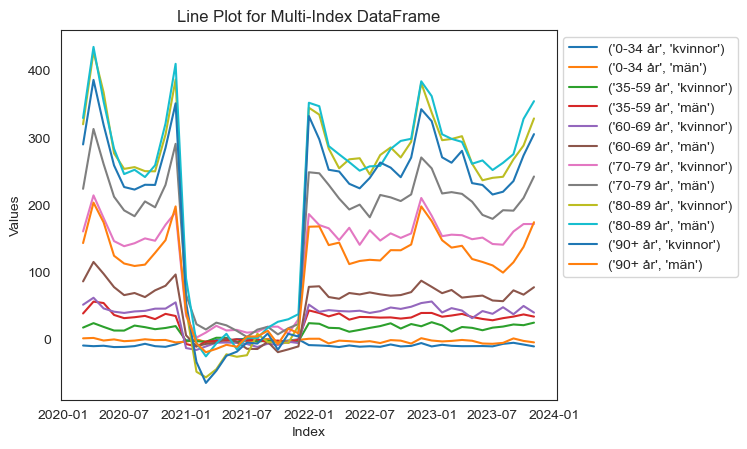

In [281]:
# Plot each column
for col in utan_totalt.columns:
    plt.plot(utan_totalt.index, utan_totalt[col], label=col)

# Add labels and legend
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Line Plot for Multi-Index DataFrame')
plt.legend()

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


# Show plot
plt.show()

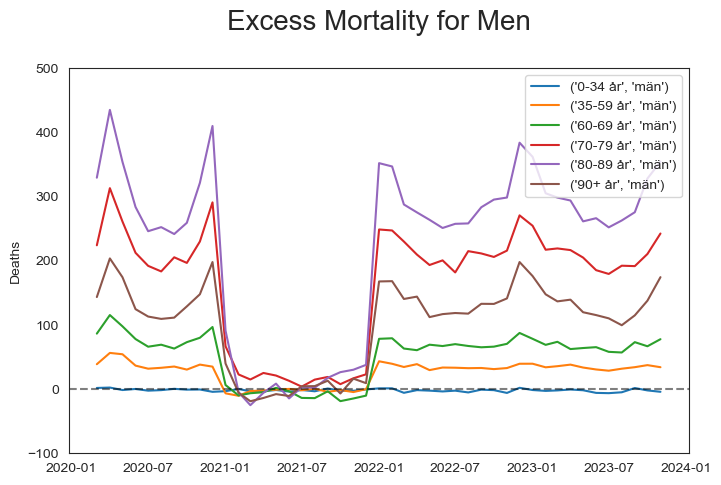

In [770]:
# Plot each column

fig, axes = plt.subplots(figsize=(8,5))

for col in män.columns:
    plt.plot(män.index, män[col], label=col)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Add labels and legend
plt.xlabel('')
plt.ylabel('Deaths')
plt.title('Excess Mortality for Men\n', size=20)

plt.legend()

plt.ylim(-100,500)

plt.legend(loc='upper right', bbox_to_anchor=(1, 1))

plt.axhline(y=0, color='black', linestyle='--', alpha = 0.5)

# Show plot
plt.savefig("one.png", dpi=300)

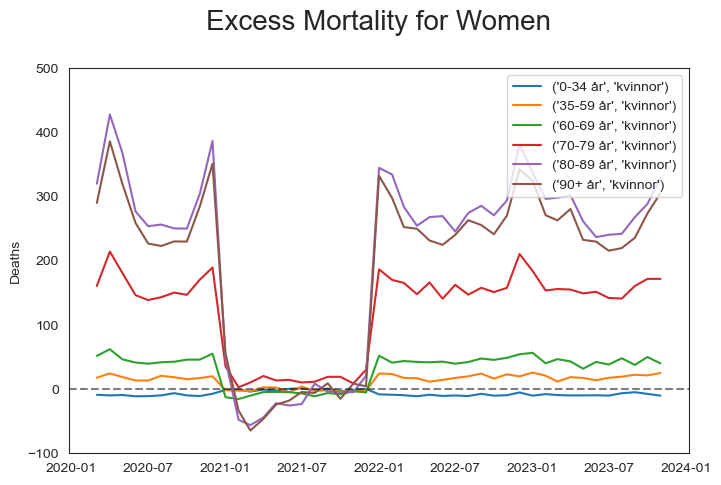

In [769]:
fig, axes = plt.subplots(figsize=(8,5))

# Plot each column
for col in kvinnor.columns:
    plt.plot(kvinnor.index, kvinnor[col], label=col)

# Add labels and legend
plt.xlabel('')
plt.ylabel('Deaths')
plt.title('Excess Mortality for Women\n', size= 20)
plt.legend()

plt.legend(loc='upper right')

plt.ylim(-100,500)

plt.axhline(y=0, color='black', linestyle='--', alpha = 0.5)

# Show plot
plt.savefig("one.png", dpi=300)

In [250]:
over70 = df.loc[:, [('70-79 år', 'män'), ('80-89 år', 'män'), ('90+ år', 'män')]]

In [247]:
d = pd.DataFrame(d)

In [265]:
just70 = df.loc[:, [('70-79 år', 'män')]]

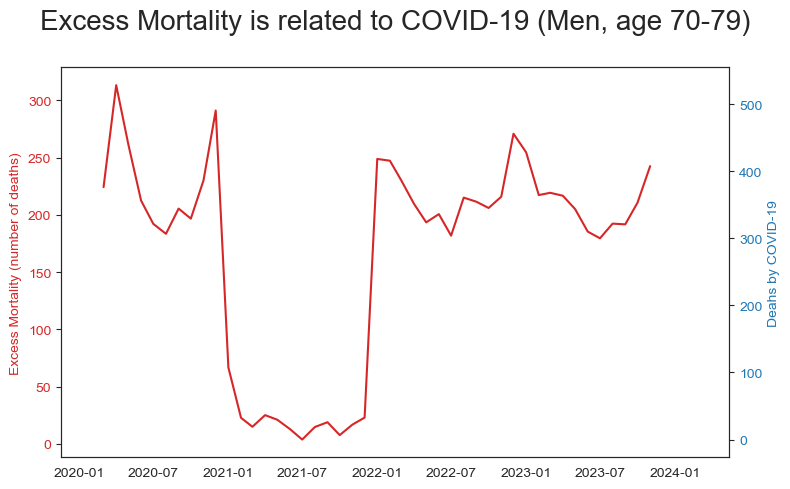

In [755]:
fig, ax1 = plt.subplots(figsize= (8,5))

color = 'tab:red'
ax1.set_xlabel('')
ax1.set_ylabel('Excess Mortality (number of deaths)', color=color)
ax1.plot(just70.index, just70, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Deahs by COVID-19', color=color)  # we already handled the x-label with ax1
ax2.plot(d.index, d, color="white", alpha = 0.005)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Excess Mortality is related to COVID-19 (Men, age 70-79)\n", size=20)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.savefig("one.png", dpi=300)

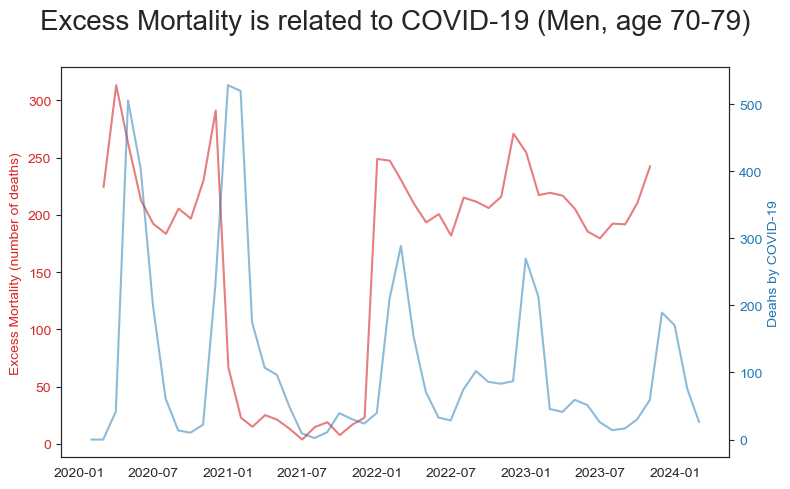

In [776]:
fig, ax1 = plt.subplots(figsize= (8,5))

color = 'tab:red'
ax1.set_xlabel('')
ax1.set_ylabel('Excess Mortality (number of deaths)', color=color)
ax1.plot(just70.index, just70, color=color, alpha= 0.6)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Deahs by COVID-19', color=color)  # we already handled the x-label with ax1
ax2.plot(d.index, d["Death"], color=color, alpha = 0.5)
ax2.tick_params(axis='y', labelcolor=color)



plt.title("Excess Mortality is related to COVID-19 (Men, age 70-79)\n", size=20)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("one.png", dpi=300)